### Support Vector Machines Example 2.4
The function **svm.SVC()** also computes support vector classifiers. However, it uses a slightly different formulation of the optimization problem. Instead of the budget parameter $C$, a cost argument is used to specify the cost of a violation to the margin, so it is reciprocal to the budget. When the cost argument is small, then the margins will be wide, and there are many support vectors. On the other hand, for large cost the margins will be narrow, and there will be only few support vectors.

We first generate training data which do not allow a separating hyperplane.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from SVM_def import SVM_def

# SVM_def is a class containing definitions used throughout this Chapter
svm_def = SVM_def()

# Create data
n = 10
np.random.seed(4) 
# x from normal distribution y is n elements -1 and n elements 1
x = np.random.normal(loc = 2, scale = 1.0, size = (2*n, 2)) 
y = np.concatenate((-1 * np.ones(n), np.ones(n)))

x[y==1, :] += 1     # offset x[:][:] for y is 1

We fit the support vector classifier for this data set with several different values of the cost parameter.

In [2]:
# create grid to evaluate model
xy, xx, yy = svm_def.create_grid(x, 10) 

# costs to consider
cost = [0.1, 1, 100]
clf, Z = [], [] # empty vectors

We now plot the support vector classifiers obtained:

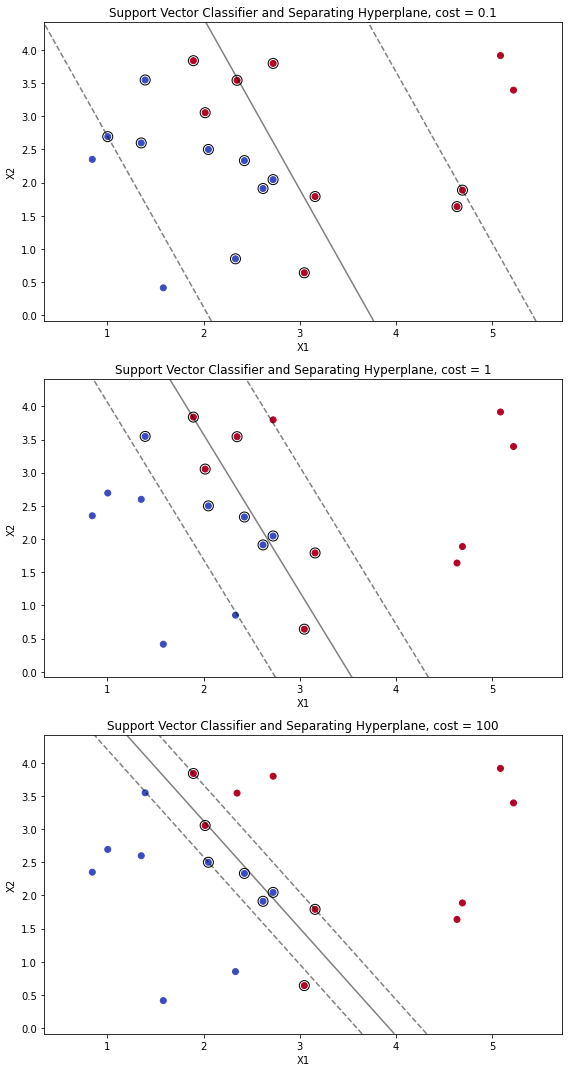

In [3]:
# Create figure
fig = plt.figure(figsize=[8, 15])

for i in range(len(cost)):
    # Fit model
    clf.append(svm.SVC(kernel='linear', C=cost[i]))
    clf[i].fit(x, y)
    # Decision function in grid
    Z.append(clf[i].decision_function(xy).reshape(xx.shape))    
    # Plot scatter Data
    ax = fig.add_subplot(3, 1, i+1) 
    svm_def.svm_plot(ax, x, y, Z[i], clf[i])

    title = ("Support Vector Classifier and Separating Hyperplane, cost = " 
             + str(cost[i]))
    plt.title(title)

plt.tight_layout()
plt.show()

Apparently, the number of support vectors decreases with increasing cost parameter. Let us check this:

In [4]:
# Attributes:
print("Number of Support Vectors:")
for i in range(len(cost)):
    print("Cost\t", cost[i], "\tSV\t", len(clf[i].support_))

Number of Support Vectors:
Cost	 0.1 	SV	 16
Cost	 1 	SV	 10
Cost	 100 	SV	 8
